Problem Statement 4: The ‘seeds.csv’ dataset contains the data about the wheat seeds, the
‘Type’ column consisit of three unique values, 1, 2, 3, which are classified based on the
charecterstics of seeds entailing in other columns.
Load the ‘seeds.csv’ dataset into a DataFrame and perform the following tasks:
1. Considering the 'Type' column as target, analyze the target column by printing the
unique values
2. Separate the feature vectors and the target variable
3. Split the dataset into train and test sets in a 70:30 ratio
4. Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores
5. For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA
Boost Classifier and compare the accuracy scores with original models using a bar plot


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("seeds.csv")
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [ ]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [ ]:
df1 = pd.concat([df['Type'].value_counts(), 
                df['Type'].value_counts(normalize=True)],axis=1, keys=('Counts','Percentage'))
df1

,Counts,Percentage
2,68,0.341709
1,66,0.331658
3,65,0.326633


In [ ]:
X = df.drop(columns = ['Type'])
X.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
y= df['Type']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= .3, random_state =100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score_dt= accuracy_score(y_pred,y_test)
print(accuracy_score_dt)

0.9


In [ ]:
from sklearn.naive_bayes import GaussianNB
gn= GaussianNB()
gn.fit(X_train,y_train)
y_pred = gn.predict(X_test)
accuracy_score_gn= accuracy_score(y_pred,y_test)
print(accuracy_score_gn)

0.9666666666666667


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(base_estimator=dt)
ad.fit(X_train,y_train)
y_pred = ad.predict(X_test)
accuracy_score_add= accuracy_score(y_pred,y_test)
print(accuracy_score_add)

0.8833333333333333


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(base_estimator=gn)
ad.fit(X_train,y_train)
y_pred = ad.predict(X_test)
accuracy_score_adg= accuracy_score(y_pred,y_test)
print(accuracy_score_adg)

0.95


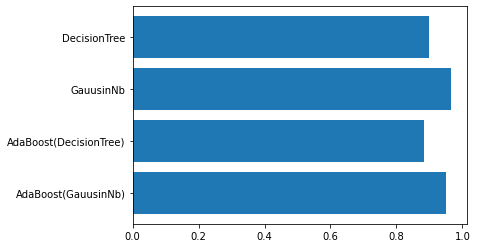

In [ ]:
import matplotlib.pyplot as plt
y=['AdaBoost(GauusinNb)', 'AdaBoost(DecisionTree)', 'GauusinNb', 'DecisionTree']

x=[accuracy_score_adg,accuracy_score_add,accuracy_score_gn,accuracy_score_dt]
plt.barh(y, x)

plt.show()